In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (200, 5)

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


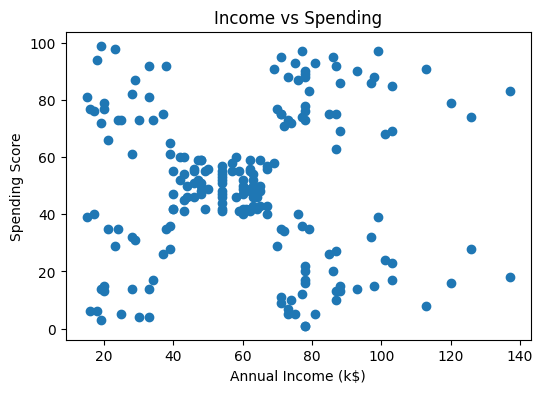

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Income vs Spending")
plt.show()

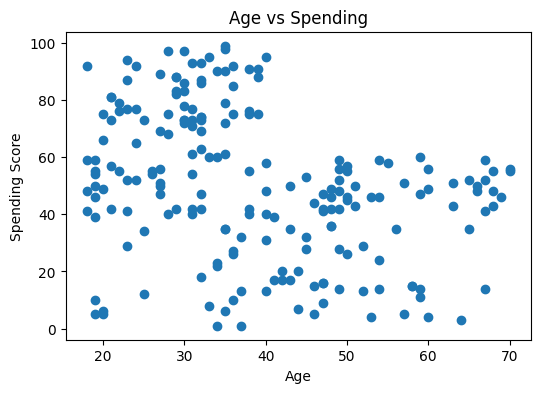

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending")
plt.show()

In [7]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [9]:
df['Cluster'] = clusters


In [10]:
sil_score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.40846873777345605


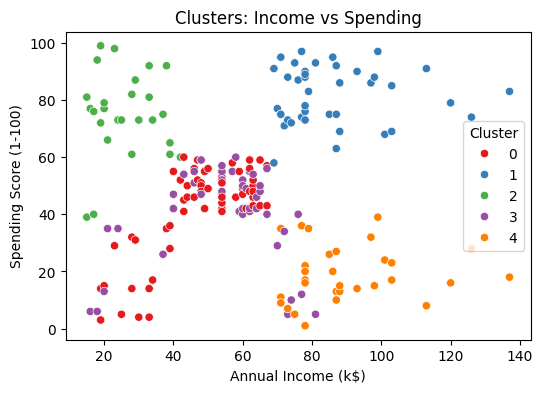

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("Clusters: Income vs Spending")
plt.show()


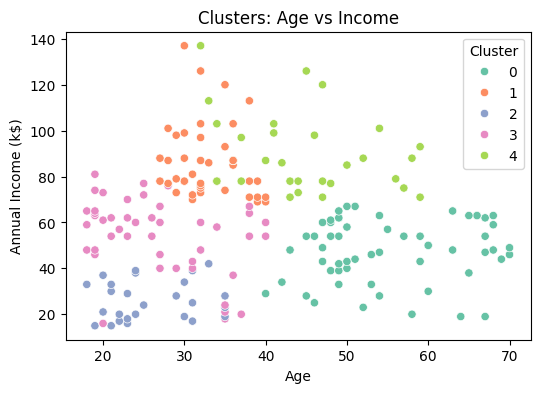

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Age',
    y='Annual Income (k$)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title("Clusters: Age vs Income")
plt.show()
